In [1]:
import numpy as np
import pandas as pd

In [2]:
#Import utility functions containing frequently used methods
import utility_functions as uf

In [3]:
from collections import Counter

In [4]:
#Missing Value Analysis
import missingno as msno

In [5]:
import matplotlib.pyplot as plt

In [6]:
from scipy.stats import chi2_contingency

In [7]:
from statsmodels.graphics.gofplots import qqplot

In [9]:
train, test = list(map(pd.read_csv, ['train.csv', 'test.csv']))

In [9]:
train_shape, test_shape = list(map(lambda x:x.shape, [train, test]))
list(map(print, [train_shape, test_shape]))

(891, 12)
(418, 11)


[None, None]

## Meaning of the Variables

sibsp:- Number of Siblings/Spouses Aboard

Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)


parch:- Number of Parents/Children Aboard

Parent = mother, father
Child = daughter, son, stepdaughter, stepson


Pclass:- Ticket class (1st, 2nd and 3rd)

1st = Upper
2nd = Middle
3rd = Lower

Embarked:- The port from which the passenger boarded the ship.
(C = Cherbourg; Q = Queenstown; S = Southampton) 

In [21]:
train['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [22]:
uf.find_missing(train).head()

,Missing Count,Missing Percentage
Features,,
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000


In [23]:
#Drop the column having more than 30% missing values
if('Cabin' in train.columns):
    train = train.drop('Cabin', axis = 1)
'Cabin' in train.columns

False

In [24]:
uf.find_missing(test).head()

,Missing Count,Missing Percentage
Features,,
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234
PassengerId,0,0.000000
Pclass,0,0.000000


In [25]:
#Drop the column having more than 30% missing values
if('Cabin' in test.columns):
    test = test.drop('Cabin', axis = 1)
'Cabin' in test.columns

False

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Categorize the variables based on their types

In [27]:
(integer_cols, float_cols, categorical_cols, other_time) = \
uf.seggregate_columns_basis_types(train)

In [28]:
(integer_cols, float_cols, categorical_cols, other_time)

(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch'],
 ['Age', 'Fare'],
 ['Name', 'Sex', 'Ticket', 'Embarked'],
 [])

In [29]:
train[categorical_cols].head()

,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S


In [30]:
train[float_cols].head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


### Analyzing the Missingness

MCAR (Missing Completely At Random)

MAR (Missing At Random)

MNAR (Missing Not At Random)

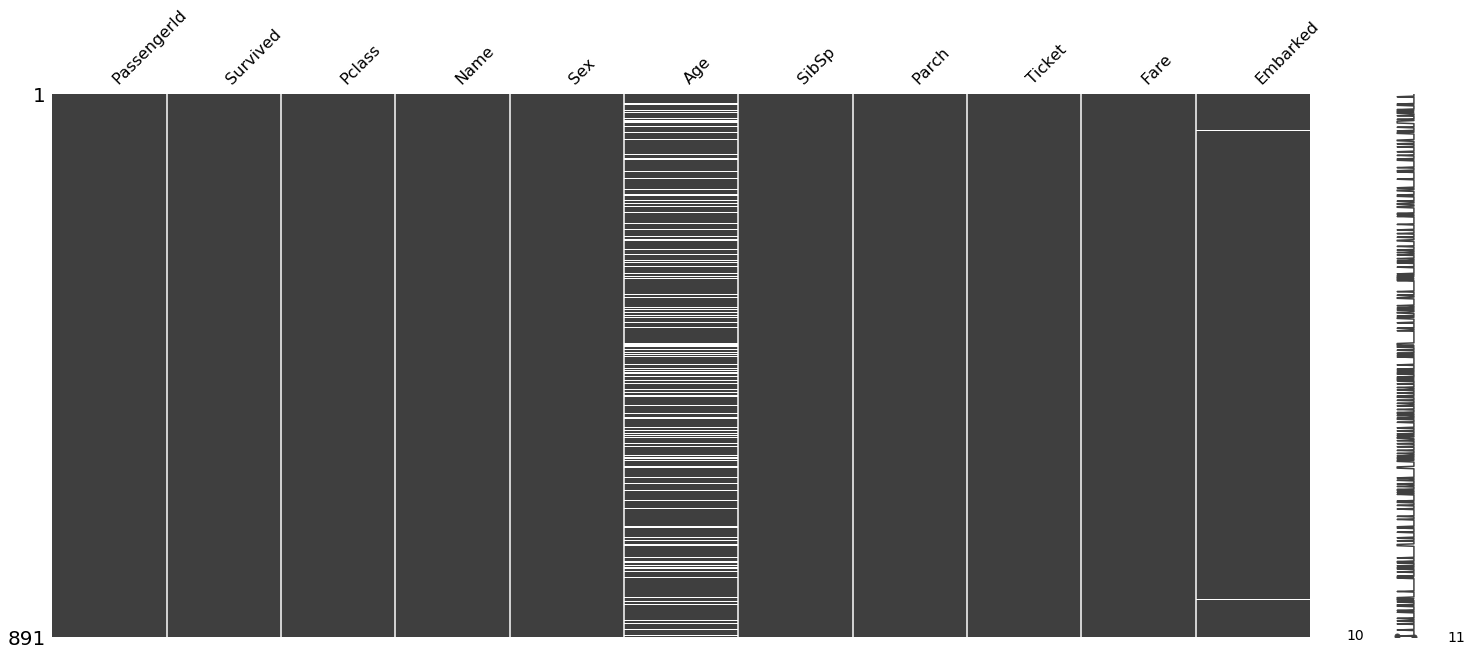

In [31]:
msno.matrix(train)

In [32]:
#Number of males and females
dict(Counter(train['Sex']))

{'male': 577, 'female': 314}

In [33]:
#Create a separate DF for males and females respectively
male_df = train.loc[train['Sex'] == 'male', :]
female_df = train.loc[train['Sex'] == 'female', :]

In [34]:
#Get the dimensions
print("Males:- {}\nFemales:- {}" .format(male_df.shape, female_df.shape))

Males:- (577, 11)
Females:- (314, 11)


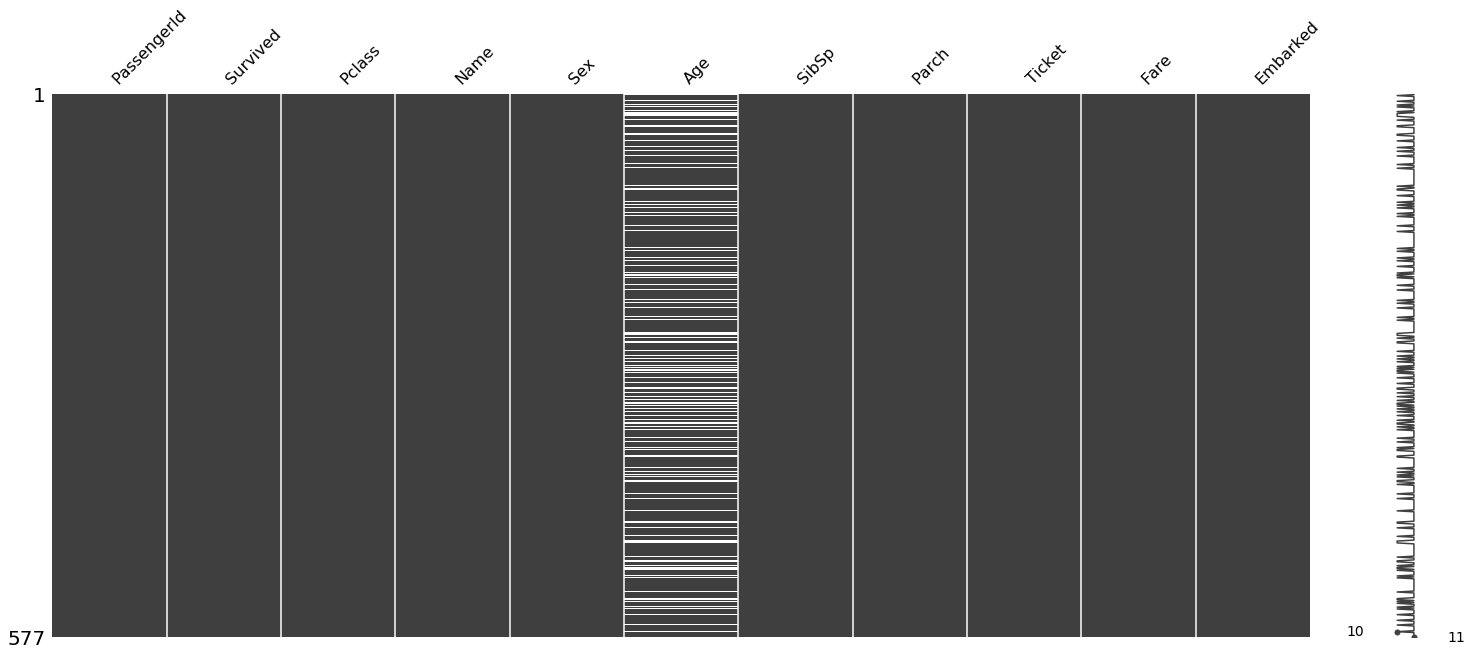

In [35]:
#Check whether there is any relationship of Gender with Age
msno.matrix(male_df)

In [36]:
#Average age of males

male_mean_age = np.mean(male_df['Age'])
print("Average Male Age:- %.2f" %(male_mean_age))

Average Male Age:- 30.73


In [37]:
#Find gender wise missing value count in Age
'''
Age value is absent for 21.49% males.
'''
uf.find_missing(male_df).head()


,Missing Count,Missing Percentage
Features,,
Age,124,21.490468
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000


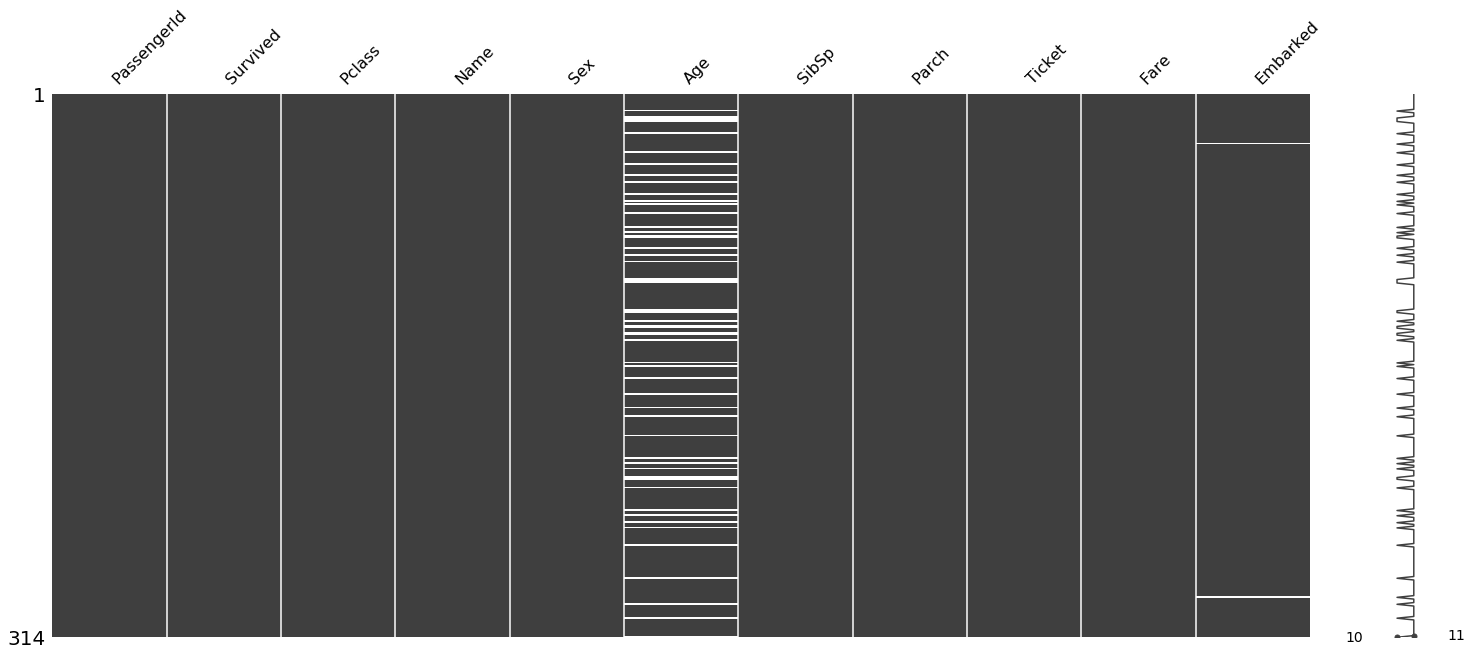

In [38]:
#Check whether there is any relationship of Gender with Age
msno.matrix(female_df)

In [39]:
#Average age of females

female_mean_age = np.mean(female_df['Age'])
print("Average Female Age:- %.2f" %(female_mean_age))

Average Female Age:- 27.92


In [40]:
#Find gender wise missing value count in Age
'''
Age value is absent for 16.87% females.
'''
uf.find_missing(female_df).head()


,Missing Count,Missing Percentage
Features,,
Age,53,16.878981
Embarked,2,0.636943
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

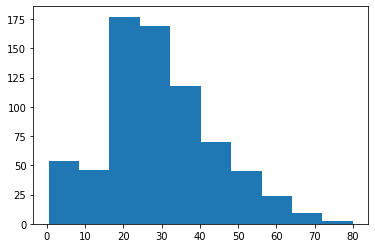

In [41]:
#Distribution of Overall Existing age 
plt.hist(train.loc[train['Age'].isna()==False, 'Age'])

(array([23., 11., 41., 47., 44., 35., 24., 19.,  9.,  8.]),
 array([ 0.75 ,  6.975, 13.2  , 19.425, 25.65 , 31.875, 38.1  , 44.325,
        50.55 , 56.775, 63.   ]),
 <a list of 10 Patch objects>)

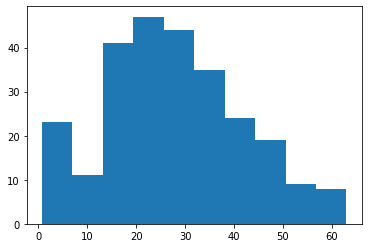

In [42]:
#Distribution of Female Age
plt.hist(female_df.loc[female_df['Age'].isna() == False, \
                   'Age'])

(array([ 28.,  23., 109., 117.,  74.,  46.,  29.,  16.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

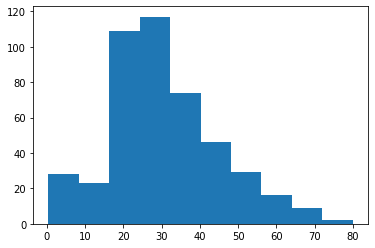

In [43]:
#Distribution of Male Age
plt.hist(male_df.loc[male_df['Age'].isna() == False, \
                   'Age'])

In [44]:
#Avg Female Age 27.91
#Avg Male Age 30.72

overall_mean_age = np.mean(train['Age'])
print("Overall Average Age:- %.2f" %(overall_mean_age))

Overall Average Age:- 29.70


### Normality Check

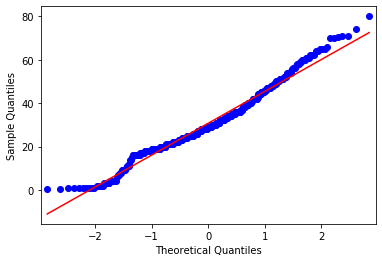

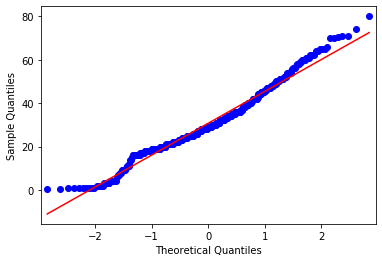

In [45]:
#QQ Plot Male
qqplot(male_df.loc[male_df['Age'].isna() == False, \
                   'Age'], line = 's')

# line = 's' implies x-axis is a standars normal distribution
# line = '45' implies the line y = x


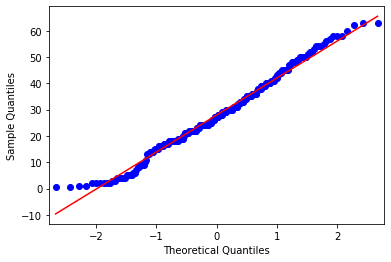

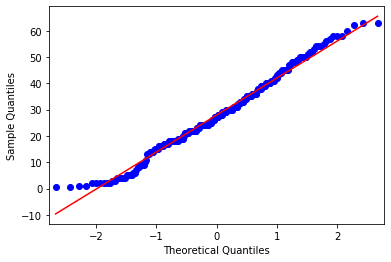

In [46]:
#QQ Plot Female
qqplot(female_df.loc[female_df['Age'].isna() == False, \
                   'Age'], line = 's')


### Find the correlation among the missing values

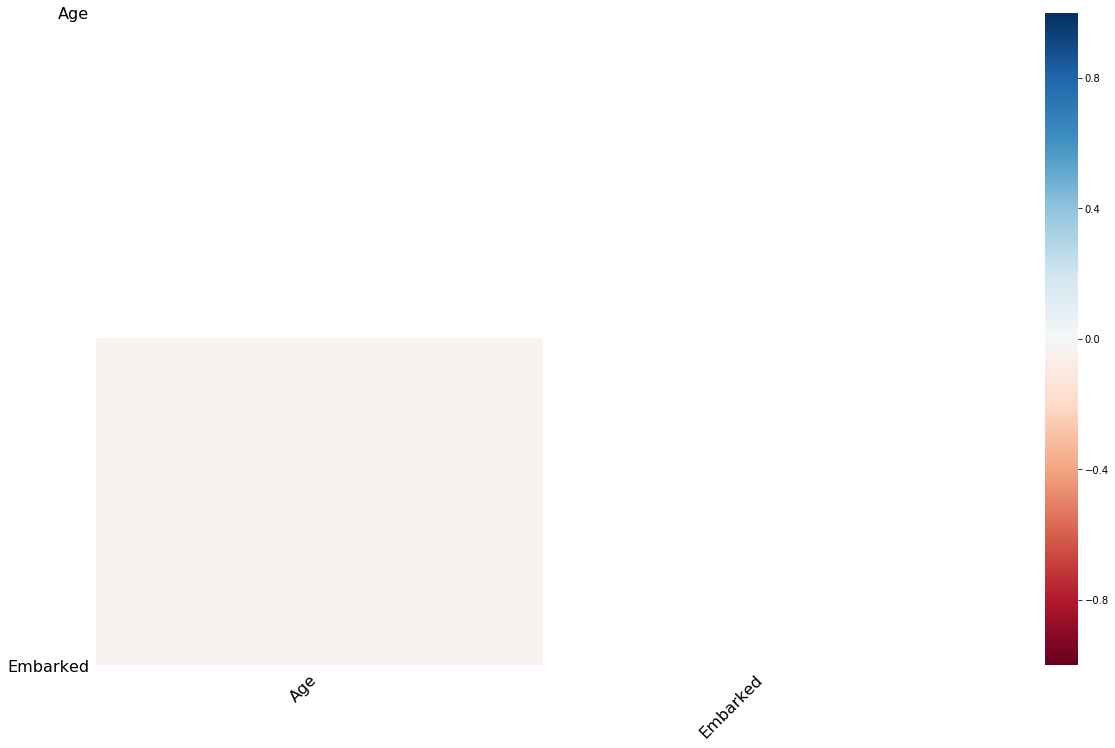

In [47]:
msno.heatmap(train)

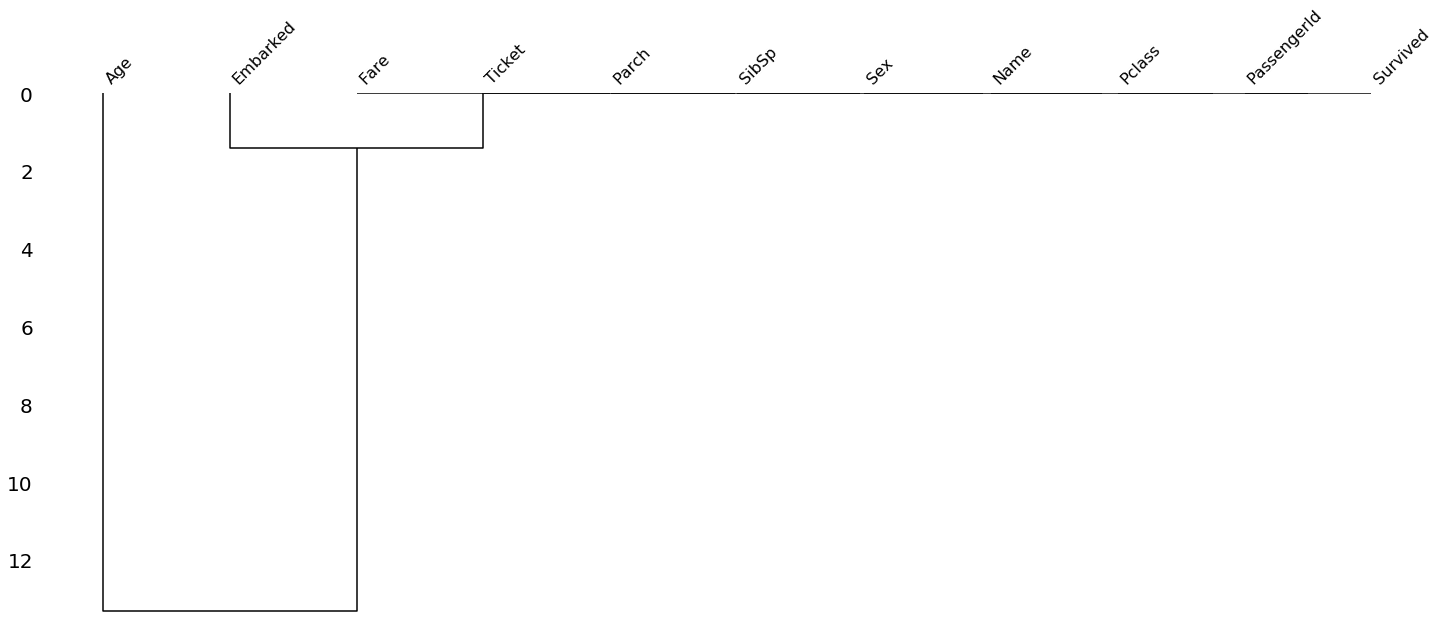

In [48]:
#Missingness Dendogram
msno.dendrogram(train)

### Imputing the Age

Imputing the age based on gender as well as Title tag(Mr, Mrs, Master etc)

In [49]:
def get_title(name):
    #Split the name string on '.'
    name_list = name.split('.')
    
    #Check whether the the lase word in the left split starts with 'M'
    if(len(name_list)==2):
        #Split the left side on ' '
        possible_title = name_list[0].split(' ')[-1]
        return possible_title
    return None

In [50]:
train['Possible Titles'] = train['Name'].apply(get_title) 

In [51]:
test['Possible Titles'] = test['Name'].apply(get_title)

In [52]:
train[['Possible Titles','Name','Age']].head()

,Possible Titles,Name,Age
0,Mr,"Braund, Mr. Owen Harris",22.0
1,Mrs,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,Miss,"Heikkinen, Miss. Laina",26.0
3,Mrs,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,Mr,"Allen, Mr. William Henry",35.0


In [53]:
#Get the unique values in the 'Possible Titles' column
Counter(train['Possible Titles'])

Counter({'Mr': 517,
         'Mrs': 124,
         'Miss': 182,
         'Master': 40,
         'Don': 1,
         'Rev': 6,
         'Dr': 7,
         'Mme': 1,
         'Ms': 1,
         'Major': 2,
         None: 1,
         'Lady': 1,
         'Sir': 1,
         'Mlle': 2,
         'Col': 2,
         'Capt': 1,
         'Countess': 1,
         'Jonkheer': 1})

In [54]:
#Create categories
male_titles = ['Mr', 'Master']
female_titles = ['Mrs', 'Miss', 'Ms']


Miss. is used for unmarried women.

Mrs. is used for married women.

Ms. is used for both unmarried and married women.

In [55]:
#Update Possible title----['Mr', 'Master', 'Mrs', 'Miss', 'Ms', 'Others']
titles = male_titles + female_titles
train['Possible Titles'] = train['Possible Titles'].apply(\
                            lambda x: x if(x in titles) else 'Others')
test['Possible Titles'] = test['Possible Titles'].apply(\
                            lambda x: x if(x in titles) else 'Others')

In [56]:
#Get the unique values in the 'Possible Titles' column
Counter(train['Possible Titles'])

Counter({'Mr': 517,
         'Mrs': 124,
         'Miss': 182,
         'Master': 40,
         'Others': 27,
         'Ms': 1})

In [57]:
Counter(test['Possible Titles'])

Counter({'Mr': 240, 'Mrs': 72, 'Miss': 78, 'Master': 21, 'Ms': 1, 'Others': 6})

In [58]:
#Find the one observation having title 'Ms'
train.loc[train['Possible Titles']=='Ms', :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Possible Titles
443,444,1,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0,S,Ms


In [59]:
#Age of the females having titles 'Mrs' and 'Miss'
print((min(train.loc[train['Possible Titles']=='Ms', 'Age'])), \
     (max(train.loc[train['Possible Titles']=='Ms', 'Age'])))

print((min(train.loc[train['Possible Titles']=='Miss', 'Age'])), \
     (max(train.loc[train['Possible Titles']=='Miss', 'Age'])))

print((min(train.loc[train['Possible Titles']=='Mrs', 'Age'])), \
      (max(train.loc[train['Possible Titles']=='Mrs', 'Age'])))

28.0 28.0
0.75 63.0
14.0 63.0


In [60]:
#Replace the missing ages in female category by the category's mean
train.loc[(train['Sex'] == 'female') &\
          (train['Age'].isna()==True),\
          'Age'] = female_mean_age


In [61]:
#Replace the missing ages in male category by the category's mean
train.loc[(train['Sex'] == 'male') &\
          (train['Age'].isna()==True),\
          'Age'] = male_mean_age


### Check the distribution post Imputation

(array([ 28.,  23., 109., 241.,  74.,  46.,  29.,  16.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

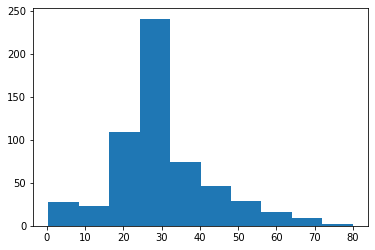

In [62]:
#Male
plt.hist(train.loc[train['Sex'] == 'male', 'Age'])

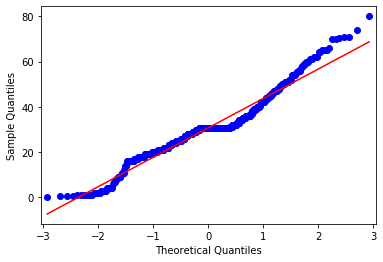

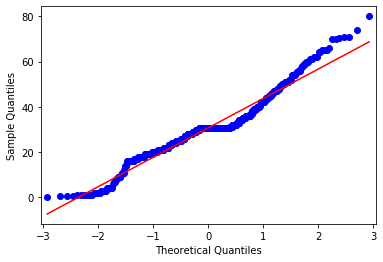

In [63]:
#QQ Plot
#Male
qqplot(train.loc[train['Sex'] == 'male', 'Age'], line = 's')

(array([23., 11., 41., 47., 97., 35., 24., 19.,  9.,  8.]),
 array([ 0.75 ,  6.975, 13.2  , 19.425, 25.65 , 31.875, 38.1  , 44.325,
        50.55 , 56.775, 63.   ]),
 <a list of 10 Patch objects>)

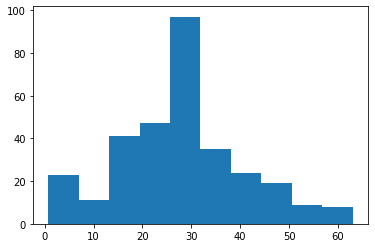

In [64]:
#Female
plt.hist(train.loc[train['Sex'] == 'female', 'Age'])

### Normality Check

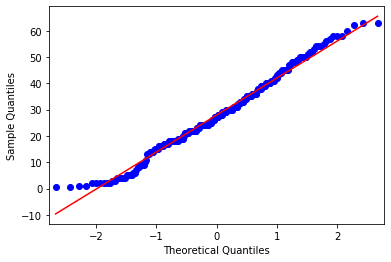

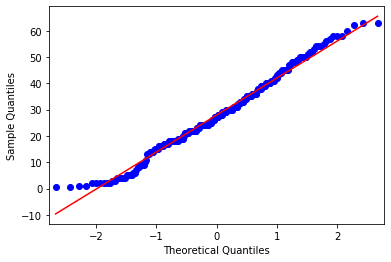

In [65]:
#QQ Plot Female
qqplot(female_df.loc[female_df['Age'].isna() == False, \
                   'Age'], line = 's')


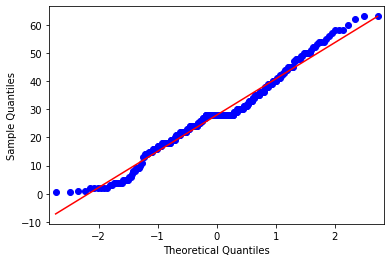

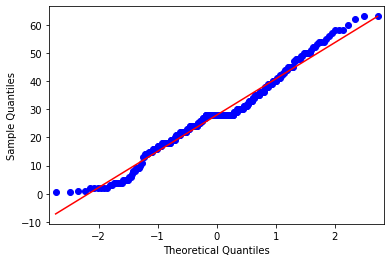

In [66]:
qqplot(train.loc[train['Sex'] == 'female', 'Age'], line = 's')

In [67]:
#Check for missing values
uf.find_missing(train).head()

,Missing Count,Missing Percentage
Features,,
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000


In [68]:
#Drop the 2 rows having missing values in the Embarked column
train = train.dropna()


In [69]:
#Check for missing values
uf.find_missing(train)

,Missing Count,Missing Percentage
Features,,
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0


In [70]:
#Drop 'PassengerId' from the train and test data
train, test = list(map(lambda x:x.drop('PassengerId', axis = 1),\
                       [train, test]))
list(map(lambda x: 'PassengerId' in x.columns, [train, test]))

[False, False]

## Relationship between gender and Target

In [71]:
#H0:- There is no statistical difference between Males and Females
#H1:- There is a difference
total_males = train.loc[train['Sex']=='male', :].shape[0]
total_females = train.shape[0] - total_males

survived_males = train.loc[(train['Sex']=='male') &\
                           (train['Survived'] == 1),\
                           :].shape[0]
not_survived_males = total_males - survived_males

survived_females = train.loc[(train['Sex']=='female') &\
                           (train['Survived'] == 1),\
                           :].shape[0]
not_survived_females = total_females - survived_females




In [72]:
#Create a Contingency Matrix
contingency_sex = pd.DataFrame(columns = ['Male', 'Female'],\
                              index = ['Survived', 'Not Survived'])

contingency_sex.loc['Survived']['Male'] = survived_males
contingency_sex.loc['Survived']['Female'] = survived_females
contingency_sex.loc['Not Survived']['Male'] = not_survived_males
contingency_sex.loc['Not Survived']['Female'] = not_survived_females

contingency_sex

,Male,Female
Survived,109,231
Not Survived,468,81


In [73]:
pd.crosstab(train['Sex'], train['Survived'])

Survived,0,1
Sex,,
female,81,231
male,468,109


In [93]:
#Expected Values
'''
41.6872890888639    88.3464566929134

289.012373453318    50.021372328459
'''

'\n41.6872890888639    88.3464566929134\n\n289.012373453318    50.021372328459\n'

## Relationship between Parch, SibSp and Pclass with the Target

In [74]:
#Find the relationship of 'parch', 'sibsp', 'Pclass' with the target
train[['Parch', 'SibSp', 'Pclass']].head()

,Parch,SibSp,Pclass
0,0,1,3
1,0,1,1
2,0,0,3
3,0,1,1
4,0,0,3


In [75]:
list(map(lambda x: dict(Counter(train[x])), ['Parch', 'SibSp', 'Pclass']))

[{0: 676, 1: 118, 2: 80, 5: 5, 3: 5, 4: 4, 6: 1},
 {1: 209, 0: 606, 3: 16, 4: 18, 2: 28, 5: 5, 8: 7},
 {3: 491, 1: 214, 2: 184}]

### Parch

(array([676., 118.,   0.,  80.,   0.,   5.,   4.,   0.,   5.,   1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

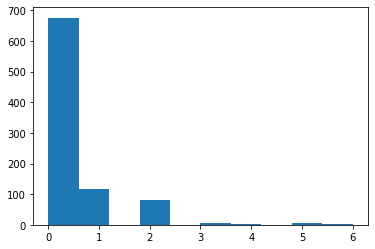

In [76]:
#Distribution of Parch
#Parent = mother, father 
#Child = daughter, son, stepdaughter, stepson
plt.hist(train['Parch'])

In [77]:
train['Parch'].dtype

dtype('int64')

(array([676.,   0.,   0.,   0.,   0., 118.,   0.,   0.,   0.,  95.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

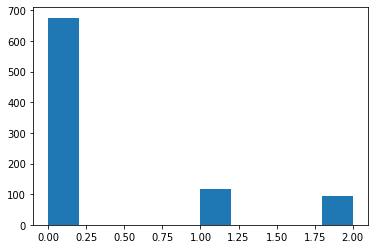

In [78]:
#Merge the categories after 2 into category 2(Child Category)
#Since the count is less
train['Parch'] = list(map(lambda x: 2 if(x>2) else x, train['Parch']))
plt.hist(train['Parch'])

(array([324.,  52.,  33.,   3.,   2.,   1.,   1.,   0.,   0.,   2.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

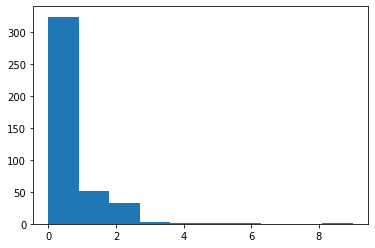

In [79]:
plt.hist(test['Parch'])

(array([324.,   0.,   0.,   0.,   0.,  52.,   0.,   0.,   0.,  42.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

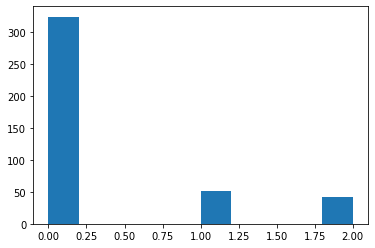

In [80]:
#Same for test data
#Merge the categories after 2 into category 2(Child Category)
#Since the count is less
test['Parch'] = list(map(lambda x: 2 if(x>2) else x, test['Parch']))
plt.hist(test['Parch'])

### SibSp

(array([606., 209.,  28.,  16.,   0.,  18.,   5.,   0.,   0.,   7.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

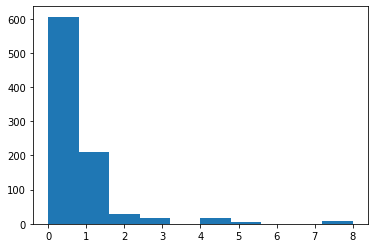

In [81]:
plt.hist(train['SibSp'])

(array([283., 110.,  14.,   4.,   0.,   4.,   1.,   0.,   0.,   2.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

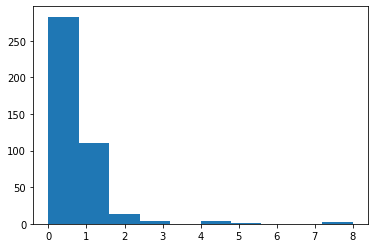

In [82]:
plt.hist(test['SibSp'])

In [83]:
#Merge the categories after 2
test['SibSp'] = list(map(lambda x: 2 if(x>2) else x, test['SibSp']))
train['SibSp'] = list(map(lambda x: 2 if(x>2) else x, train['SibSp']))

(array([606.,   0.,   0.,   0.,   0., 209.,   0.,   0.,   0.,  74.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

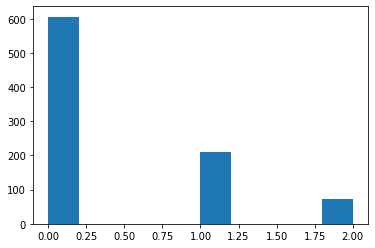

In [84]:
plt.hist(train['SibSp'])

(array([283.,   0.,   0.,   0.,   0., 110.,   0.,   0.,   0.,  25.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

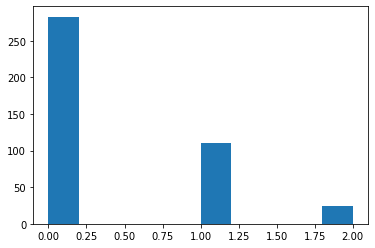

In [85]:
plt.hist(test['SibSp'])

In [86]:
help(float)

Help on class float in module builtins:

class float(object)
 |  float(x) -> floating point number
 |  
 |  Convert a string or number to a floating point number, if possible.
 |  
 |  Methods defined here:
 |  
 |  __abs__(self, /)
 |      abs(self)
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __divmod__(self, value, /)
 |      Return divmod(self, value).
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __float__(self, /)
 |      float(self)
 |  
 |  __floordiv__(self, value, /)
 |      Return self//value.
 |  
 |  __format__(...)
 |      float.__format__(format_spec) -> string
 |      
 |      Formats the float according to format_spec.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getformat__(...) from builtins.type
 |      float.__getformat__(typestr) -> string
 |      
 |      You probably don

### Relationship of Pclass, SibSp and Parch on the target

In [87]:
#Class wise survival stats
def get_category_wise_survival_count(variable, category):
    category_data = train.loc[train[variable] == category, 'Survived']
    plt.hist(category_data)
    
    #Survived count
    survived_percentage = (sum(category_data)/len(category_data)).__format__(".2f")
    
    plt.title("Category " + str(category))
    plt.xlabel('Survived Yes or No')
    plt.ylabel("Survival Percentage =" + str(survived_percentage))
    plt.show()


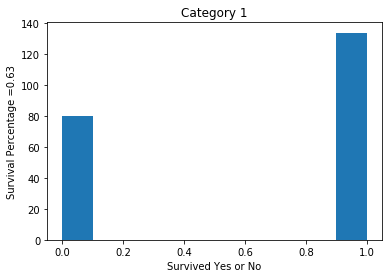

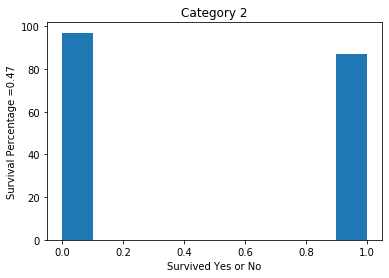

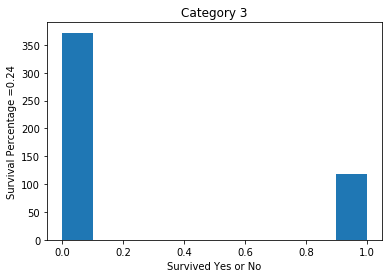

[None, None, None]

In [88]:
#Survival percentage is highest amongst Class 1 and 
#lowest amongst Class3.
[get_category_wise_survival_count('Pclass', pclass)\
 for pclass in np.unique(train['Pclass'])]

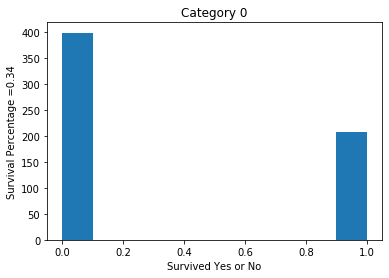

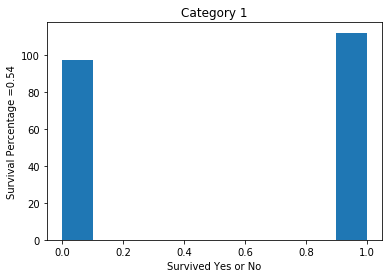

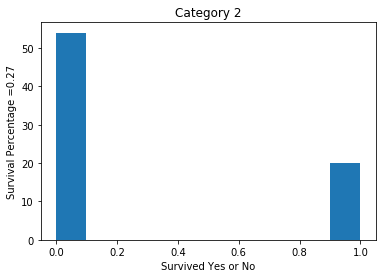

[None, None, None]

In [89]:
#Category 0 ===> Single person - alone
#Category 1 ===> One Sibling
#Category 2 ===> 2 or More Siblings
[get_category_wise_survival_count('SibSp', sib_type) \
 for sib_type in np.unique(train['SibSp'])]

#Observations
#34% of those who do not have a sibling survived
#54% of those who have 1 sibling survived
#27% of those who have 2 or more siblings survived

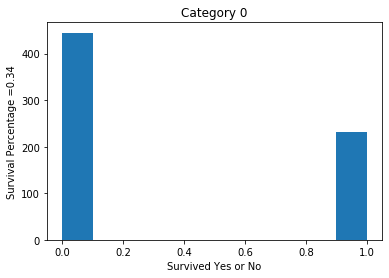

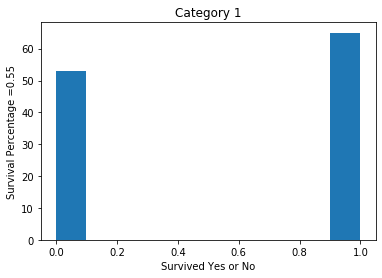

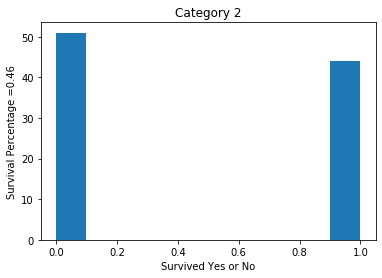

[None, None, None]

In [90]:
#Parent and Child
[get_category_wise_survival_count('Parch', sib_type) \
 for sib_type in np.unique(train['Parch'])]


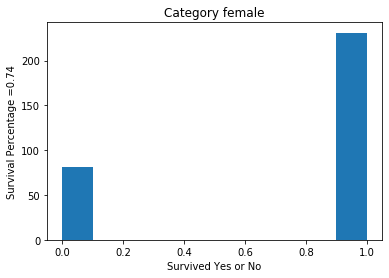

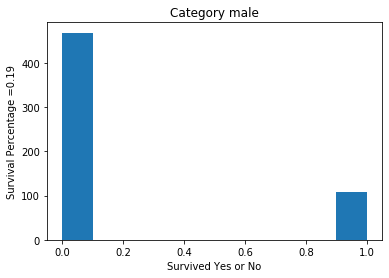

[None, None]

In [91]:
#Survival w.r.t Gender
[get_category_wise_survival_count('Sex', gender) \
 for gender in np.unique(train['Sex'])]


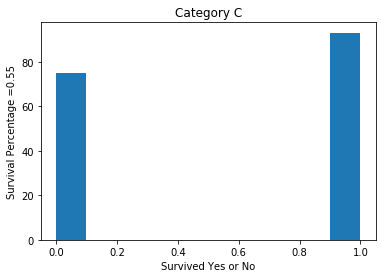

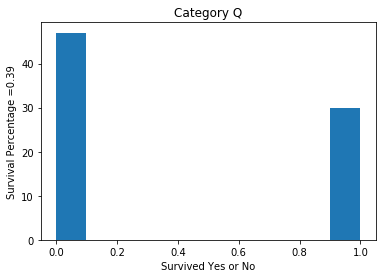

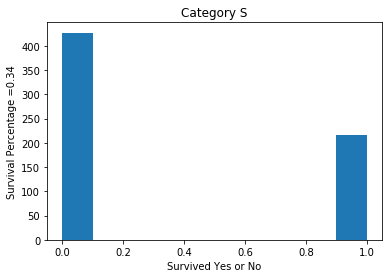

[None, None, None]

In [92]:
[get_category_wise_survival_count('Embarked', boarding_pt)\
 for boarding_pt in np.unique(train['Embarked'])]

### Observations

1. 

2. Maximum survival in category 'C' and Minimum survival in 'S'.

3. Surivival percentage of Females is more than males

In [93]:
#Remove Name and Ticket from categorical_cols
if('Name' in categorical_cols):
    categorical_cols.remove('Name')
if('Ticket' in categorical_cols):
    categorical_cols.remove('Ticket')
    
#Convert the 3 columns to Object
for col in ['Parch', 'SibSp', 'Pclass']:
    train[col] = train[col].astype(str)

#One Hot Encoding of the categorical features
encoded_data, OHE_features = uf.OHE(train,\
                                 categorical_cols + ['Parch', 'SibSp', 'Pclass'])

In [95]:
encoded_data[OHE_features].head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Parch_0,Parch_1,Parch_2,SibSp_0,SibSp_1,SibSp_2,Pclass_1,Pclass_2,Pclass_3
0,0,1,0,0,1,1,0,0,0,1,0,0,0,1
1,1,0,1,0,0,1,0,0,0,1,0,1,0,0
2,1,0,0,0,1,1,0,0,1,0,0,0,0,1
3,1,0,0,0,1,1,0,0,0,1,0,1,0,0
4,0,1,0,0,1,1,0,0,1,0,0,0,0,1


In [96]:
len(OHE_features)

14

In [97]:
encoded_data.shape

(889, 25)

In [98]:
train.shape

(889, 11)

## Correlation Analysis

In [99]:
#H0:- The two variables being considered are independent
#H1:- There is some relationship between the two variables

def chi_squared_test(data, categorical_cols, var_2 = 'Survived'):
    selected_vars = []
    for cat_var in categorical_cols:
        chi, p_value, dof, exp = chi2_contingency(\
                                            pd.crosstab(\
                                            data[var_2], data[cat_var]))
        if(p_value >= 0.05):
            selected_vars.append(cat_var)
    
    return (selected_vars)

In [100]:
categorical_cols

['Sex', 'Embarked']

In [88]:
encoded_data[OHE_features].head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,SibSp_0,SibSp_1,SibSp_2,Pclass_1,Pclass_2,Pclass_3
0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1
1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
2,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1
3,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0
4,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1


In [101]:
list(map(lambda x:Counter(encoded_data[x]), ['Pclass_2', 'SibSp_2',\
                                       'Parch_1', 'Parch_2', \
                                       'Parch_0', 'Embarked_Q']))

[Counter({0: 705, 1: 184}),
 Counter({0: 815, 1: 74}),
 Counter({0: 771, 1: 118}),
 Counter({0: 794, 1: 95}),
 Counter({1: 676, 0: 213}),
 Counter({0: 812, 1: 77})]

In [102]:
selected_categorical = chi_squared_test(encoded_data, OHE_features)

## WOE-IV

In [112]:
#This function will divide the set of values into bins
def get_bins(var, data = train, bins = 10):
    #Numeric Variables
    if(data[var].dtype == int or data[var].dtype == float):
        bins = pd.cut(data[var], bins=bins) #no. of bins can be changed
        return (bins)
    
    #If the variable is categorical each category acts like a bin
    if(data[var].dtype == object):
        categories = list(np.unique(data[var]))
        return (categories)
    return None

In [13]:
#Avoiding
'''
Log(0/1)        categories = list(np.unique(data[var]))
        return (categories)
    return 
Log(1/0)
'''
def woe_iv_sanity(goods, bads, total_goods, total_bads):
    if(goods == 0):
        goods = ((goods + 0.5)/total_goods)
    if(bads == 0):
        bads = ((bads + 0.5)/total_bads)
    
    return (goods, bads)

In [11]:
def get_group_wise_stats(data, total_survived, total_died, target = 'Survived'):
    #Frequency, %goods, %bads
    frequency = data.shape[0]
    no_goods = data.loc[data[target]==1, 'Survived'].shape[0]
    no_bads = frequency - no_goods
    
    #Handling the 0 values
    no_goods, no_bads = woe_iv_sanity(no_goods, no_bads, total_survived, total_died)
    
    per_goods, per_bads = list(map(lambda x: x*100/frequency,\
                                   [no_goods, no_bads]))
    
    return (frequency, per_goods, per_bads)

In [107]:
def WOE_IV(var, target= 'Survived', data=train):
    #Number of survived and died
    total_survived = data.loc[data[target]==1, target].shape[0]
    total_died = data.shape[0] - total_survived
    
    #Obtain the bins
    bins = get_bins(var, data)
    
    #Create a WOE_IV data frame
    WOE_IV_df = pd.DataFrame()
    bins, woe_s, iv_s = [], [], []
    
    if(data[var].dtype == object):
        bin_grp = data.groupby(var)
        for grp, df in bin_grp:
            #Calculate the number of goods and bads
            frequency, per_survived, per_died = get_group_wise_stats(df, total_survived, total_died)
            
            woe_s.append(np.log(per_survived/per_died))
            iv_s.append(per_survived - per_died)
        
        WOE_IV_df[var + '_bins'] = list(bin_grp.groups)
        WOE_IV_df['WOE'] = woe_s
        WOE_IV_df['IV'] = iv_s
    return WOE_IV_df

In [103]:

WOE_IV('Sex').head()

,Sex_bins,WOE,IV
0,female,1.04363,47.909968
1,male,-1.45712,-62.218371


In [103]:
for col in categorical_cols:
    print(col)
    print(list(np.unique(train[col])))

Sex
['female', 'male']
Embarked
['C', 'Q', 'S']


In [105]:
uf.find_missing(train[categorical_cols])

,Missing Count,Missing Percentage
Features,,
Sex,0,0.0
Embarked,0,0.0


In [106]:
list(map(lambda col_name: list(np.unique(train[col_name])), \
         categorical_cols))

[['female', 'male'], ['C', 'Q', 'S']]

In [109]:
WOE_IV_sex, WOE_IV_embarked = list(map(lambda col_name: \
                                       WOE_IV(col_name), \
                                       categorical_cols))

In [110]:
WOE_IV_sex.head()

,Sex_bins,WOE,IV
0,female,1.047969,48.076923
1,male,-1.457120,-62.218371


In [111]:
WOE_IV_embarked.head()

,Embarked_bins,WOE,IV
0,C,0.215111,10.714286
1,Q,-0.448950,-22.077922
2,S,-0.676887,-32.608696


## Logistic Regression

### Assumptions of Logistic Regression

1. Log odds ratio should be linearly related to the Independent Variables

2. No multicollinearity

3. 

In [15]:
#Log Odds Ratio and Independent Variables
'''
Get the probabilities of Predictions.
Sort the probabilities in Descending order.
Divide the data into bins.
Find the WOE-IV for each of the bins.
Plot the WOE values for each of the bins.
They must be linearly related to the probabilities.(1/(1+np.e**((theta.T).X)))
Fit a line with the 
'''

'\nGet the probabilities of Predictions.\nSort the probabilities in Descending order.\nDivide the data into bins.\nFind the WOE-IV for each of the bins.\nPlot the WOE values for each of the bins.\nThey must be linearly related to the probabilities.(1/(1+np.e**((theta.T).X)))\nFit a line with the \n'

In [16]:
def get_numpy_array(data, features, target):
    #Add a constant feature to the list of features
    data['Constant'] = 1
    
    #Append the feature list
    feature = 'Constant' + features
    
    feature_matrix, target = list(map(np.array, \
                                      [data[features], data[target]]))
    
    return (feature_matrix, target)

In [19]:
def get_probability(feature_matrix, weights):
    score = np.dot(weights, feature_matrix)
    
    return ((1 + np.e ** (score)) ** (-1))

In [18]:
#Set the default threshold equal to the proportion of events(here 1)
thresh = train.loc[train['Survived']==1, 'Survived'].shape[0]/train.shape[0]

def get_prediction(probability, threshold = thresh):
    if(probability>threshold):
        return 1
    else:
        return 0

In [17]:
def get_derivative(error, feature):
    return (np.dot(feature, error))

In [20]:
def create_df(column_list, values_list):
    df = pd.DataFrame(columns = column_list)
    for col, values in zip(column_list, values_list):
        df[col] = values
    
    
    #Return the created data frame
    return df

In [97]:
def logistic_regression(initial_coefficients, feature_matrix,\
                        features, target, max_iter=10, step_size = 0.01):
    
    coefficients = initial_coefficients
    
    #If target = 1 then indicator = 1, else indicator = 0
    indicator = (target==1)
    
    iterations = 0
    while(iterations<max_iter):
        for j in range(len(features)):
            #Prediction Probability
            probability = get_probability(feature_matrix[j])
            
            #Error
            error = (indicator - probability)
            
            #Derivative
            derivative = get_derivative(error, feature_matrix[j])
            
            #Update the coefficients
            coefficients[j] += step_size * derivative
            
        iterations += 1
    #The coefficients at the end of final iteration will be returned    
    return (coefficients)

In [101]:
encoded_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,...,Parch_3,Parch_4,Parch_5,Parch_6,SibSp_0,SibSp_1,SibSp_2,Pclass_1,Pclass_2,Pclass_3
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,...,0,0,0,0,0,1,0,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,...,0,0,0,0,0,1,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,...,0,0,0,0,1,0,0,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,...,0,0,0,0,0,1,0,1,0,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,...,0,0,0,0,1,0,0,0,0,1


In [102]:
integer_cols

['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch']

In [103]:
float_cols

['Age', 'Fare']

In [104]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Possible Titles'],
      dtype='object')

In [105]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Possible Titles
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [109]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [99]:
#Adding 1 for the constant
initial_coefficients = np.zeros(features + 1)

NameError: name 'features' is not defined

In [ ]:
logistic_regression()